# 1- Dataset
## 1.1 Import Libraries

In [113]:
# For EDA
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# For SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#for nive bais
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## 1.2 Import Data

In [114]:
df_base = pd.read_csv('./data.csv')
df_base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1.3 Dataset Attributes
* **customerID** ->
  A unique ID that identifies each customer.
* **gender** ->
  The customer’s gender: (Male, Female)
* **SeniorCitizen** ->
  Indicates if the customer is 65 or older: (Yes, No)
* **Partner** ->
  Indicates if the customer is married: (Yes, No)
* **Dependents** ->
  Indicates the number of dependents that live with the customer.
* **tenure** ->
  Number of months the customer has stayed with the company
* **PhoneService** ->
  Indicates if the customer subscribes to home phone service with the company: (Yes, No)
* **MultipleLines** ->
  Indicates if the customer subscribes to multiple telephone lines with the company:(Yes, No)
* **InternetService** ->
  Indicates if the customer subscribes to Internet service with the company: (DSL, Fiber Optic)
* **OnlineSecurity** ->
  Indicates if the customer subscribes to an additional online security service provided by the company: (Yes, No)
* **OnlineBackup** ->
  Indicates if the customer subscribes to an additional online backup service provided by the company: (Yes, No)
* **DeviceProtection** ->
  Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: (Yes, No)
* **TechSupport** ->
  Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: (Yes, No)
* **StreamingTV** ->
  Indicates if the customer uses their Internet service to stream television programing from a third party provider: (Yes, No) The company does not charge an additional fee for this service.
* **StreamingMovies** ->
  Indicates if the customer uses their Internet service to stream movies from a third party provider: (Yes, No) The company does not charge an additional fee for this service.
* **Contract** ->
  Indicates the type of the contract (Month-to-month, One year, Two year)
* **PaperlessBilling** ->
  Indicates if the customer has chosen paperless billing: (Yes, No)
* **PaymentMethod** ->
  Indicates how the customer pays their bill: (Bank Withdrawal, Credit Card, Mailed Check)
* **MonthlyCharges** ->
   Indicates the customer’s total charges, calculated to the end of the quarter specified above.
* **TotalCharges** ->
  Indicates the total amount of months that the customer has been with the company.
* **Churn** ->
  Yes = the customer left the company this quarter.
  No = the customer remained with the company. Directly related to Churn Value.

# 2- Exploratory Data Analysis (EDA)

## 2.1 Data Understanding

In [115]:
# Get the shape of the data
df_base.shape

(7043, 21)

In [116]:
# Get all columns
df_base.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [117]:
# Check the data types
df_base.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [118]:
# Describe the data
df_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can conclude that:

1- 75% of the customers have tenure less than 55 months

2- The mean tenure is around 32 months

3- The mean monthly charges are roughly around 64.76 USD 25% customers pay more than 89.85 US


Text(0.5, 1.0, 'No of Churned Customers')

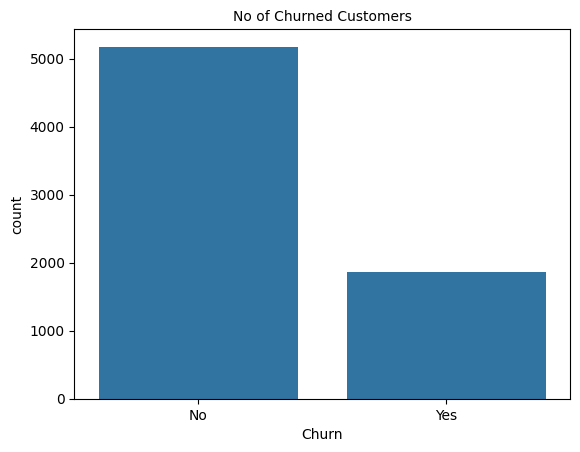

In [119]:
sns.countplot( x = df_base['Churn'])
plt.title('No of Churned Customers' , fontsize=10)

In [120]:
df_base['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

As the distribution of data is not around 50:50 we can say that dataset is almost good

Observations in Train dataset:

  * There are total of 21 columns: 3 numerical, 16 categorical, 1 id and 1 target column
  * Total Charges provides a numerical values, but the numbers are stored as on object
  * Some categorical features are stored as a string
  * There are 7043 rows in entire data set
  * Churn is the target variable

In [121]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Seems like there are no missing values

In [122]:
df= df_base.copy()

## 2.2 Data Cleaning

### Drop duplicated columns

In [123]:
print('Number of duplicated values in dataset: ', df.duplicated().sum())
df.drop_duplicates(inplace=True)
print('Check duplicates: ', df.duplicated().sum())

Number of duplicated values in dataset:  0
Check duplicates:  0


In [124]:
# after tying to convert this column to type float, it return an error
# maybe there is blank values
# df['TotalCharges'].astype('float64') 

In [125]:
# Replace spaces with NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see now there are 11 missing values from the TotalCharges columns.

### Drop null values

In [126]:
#Dropping the null values
df.dropna(inplace=True)

### Change data types

In [127]:
# Display the number of unique values for each column
unique_values = df.nunique()
print(unique_values)

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


In [128]:
# Convert to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Encoding binary categorical columns (e.g., Yes/No)
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                  'PaperlessBilling']

for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  
 17  

In [129]:
# Save cleaned dataset to use it in GUI
# df.to_csv("cleaned_dataset.csv", index = False)

### Drop unnecessary columns
We don't need a customerID column, so I'll delete it.

In [130]:
df = df.drop('customerID', axis=1)

The length of service is a specific number, and it is difficult to visualize. 

Therefore, we will divide it into bins and assign them into groups. 

For example, the length of service is less than 12 months, then assign the group of 1-12 months as 0-1 year, for 13-24, assign the group as between 1-2 years and so on.

In [131]:
df['tenure'].max() #The max tenure is 72 months or 6 years

72

In [132]:
# Group the tenures in bins of 12 months
df['tenure_group'] = pd.cut(
    df['tenure'], 
    bins=range(1, 80, 12), 
    right=False, 
    labels=[f"{i}-{i+11}" for i in range(1, 72, 12)]
)
df['tenure_group'].value_counts()

tenure_group
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

We can notice that:

* customers who have tenure less than a year are the ones who are most likely to churn whereas the clients who have been with the company the longest are very less likely to churn. 
* Also the number of customers with a monthly tenure is higher than others.
* Now, lets remove the tenure column now as we have already transformed it into tenure_group

In [133]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No,1-12
1,1,0,0,0,34,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,No,25-36
2,1,0,0,0,2,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes,1-12
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No,37-48
4,0,0,0,0,2,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes,1-12


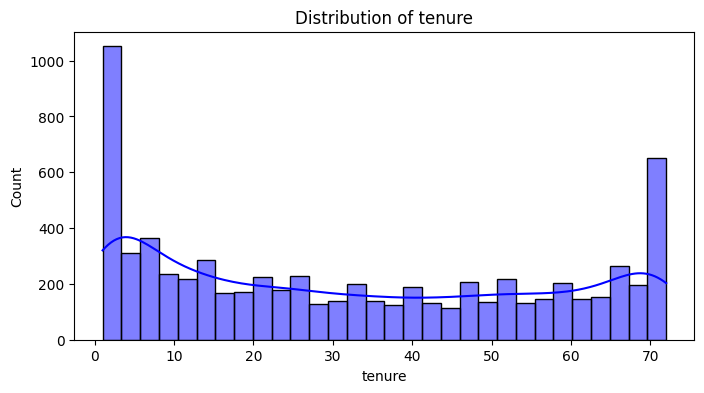

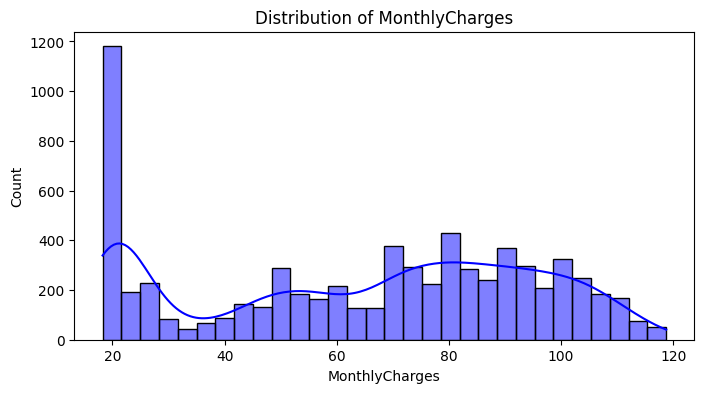

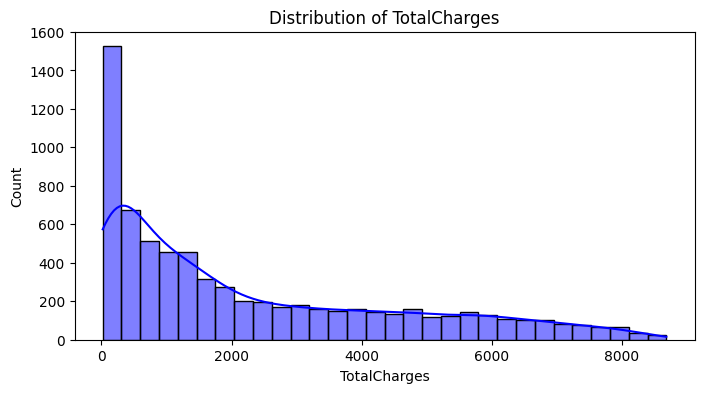

In [134]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Distribute numerical data using graphs
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

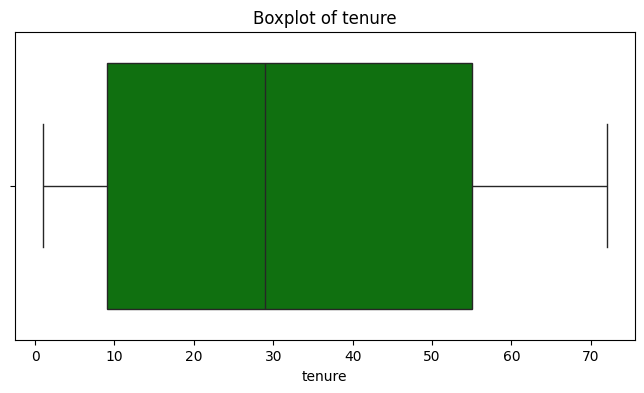

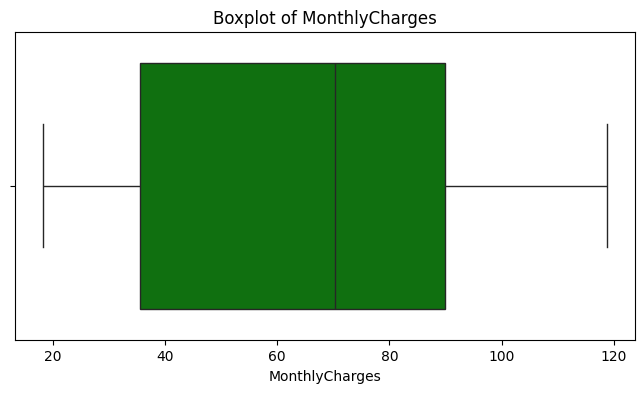

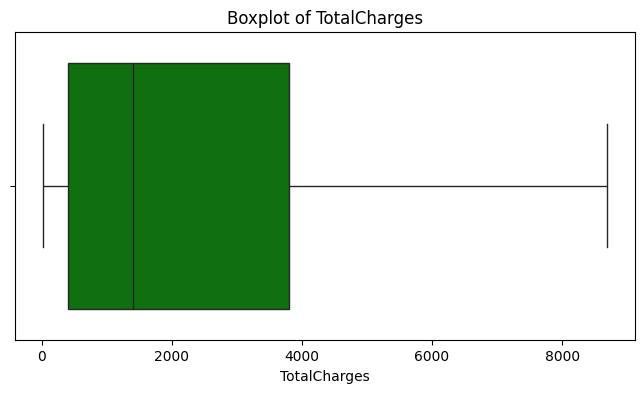

In [135]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column], color='green')
    plt.title(f'Boxplot of {column}')
    plt.show()

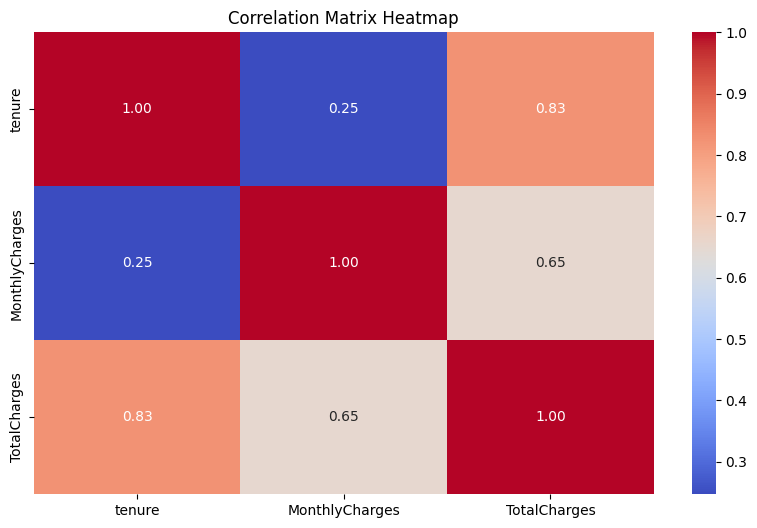

In [136]:
corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

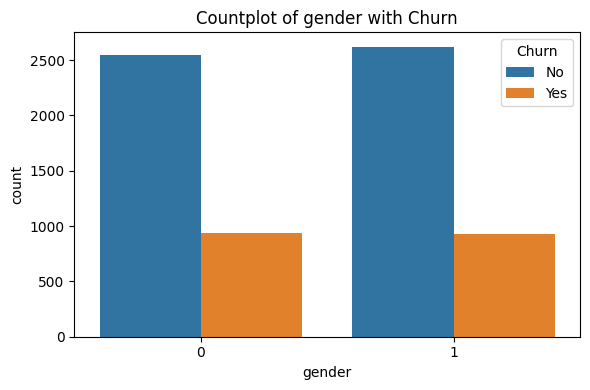

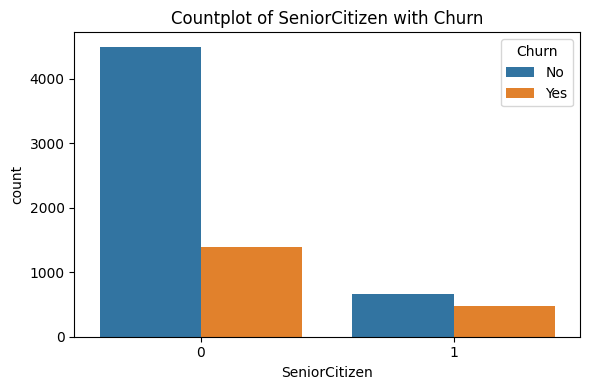

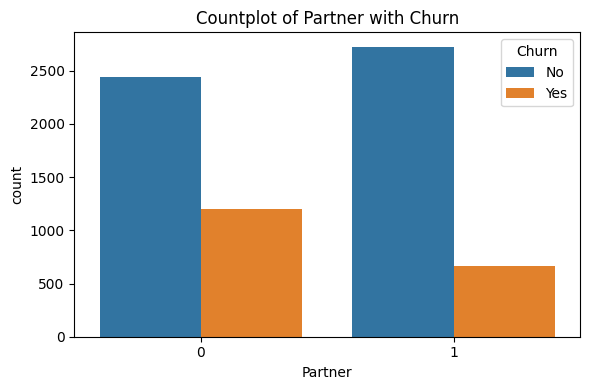

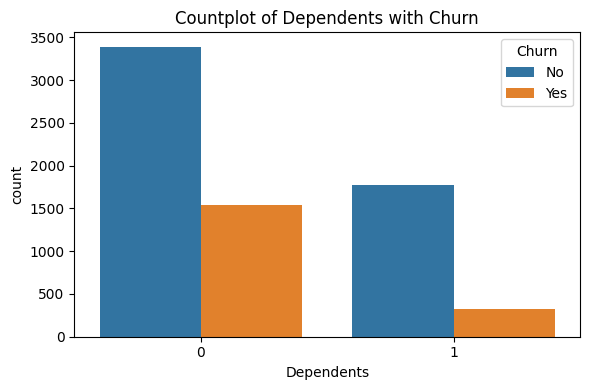

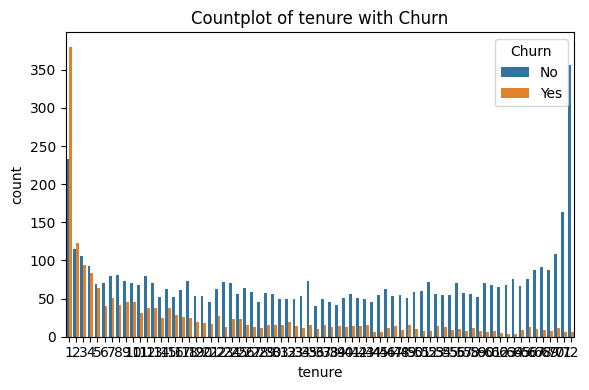

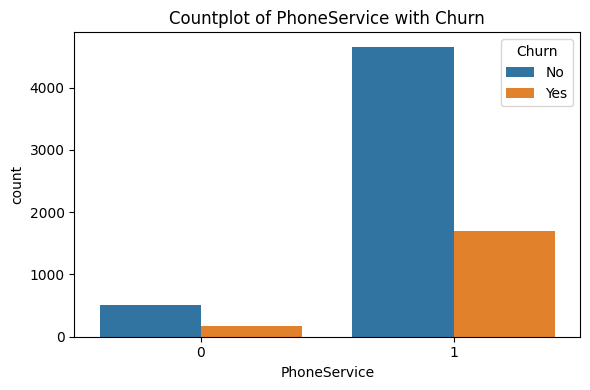

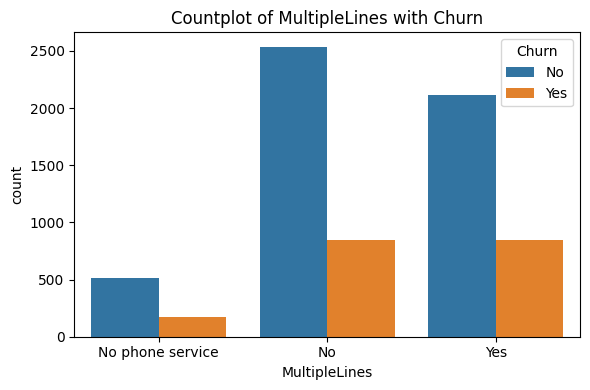

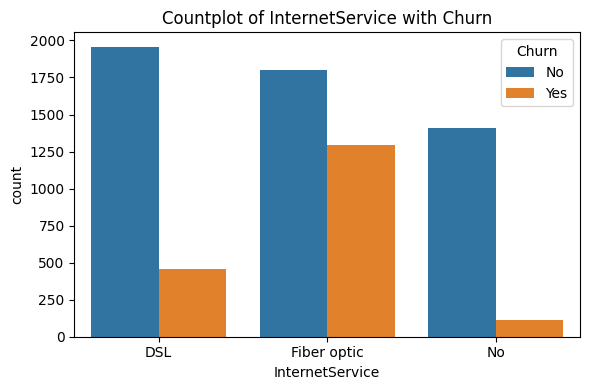

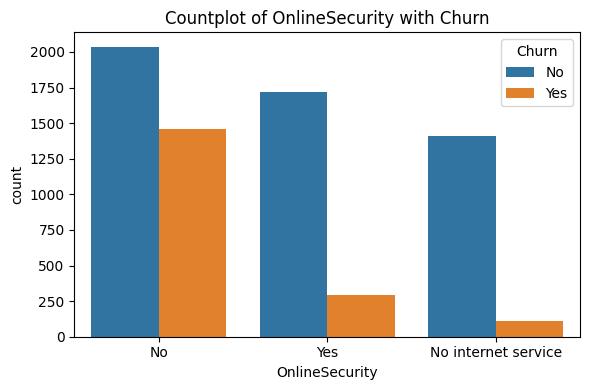

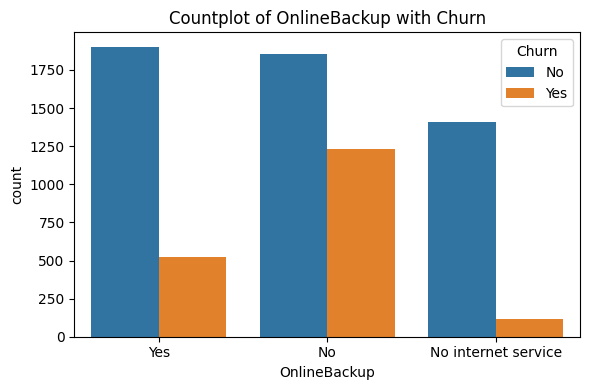

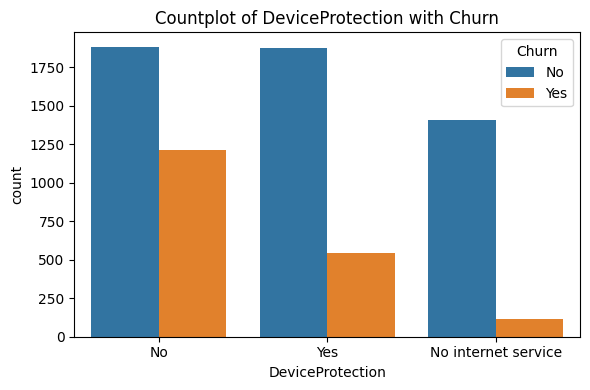

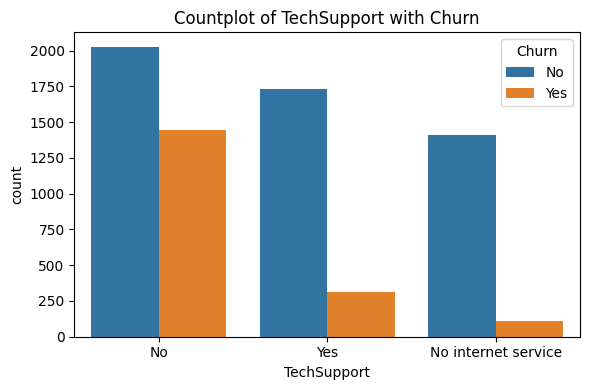

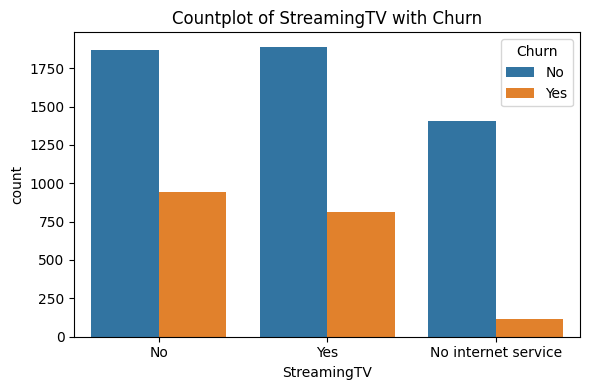

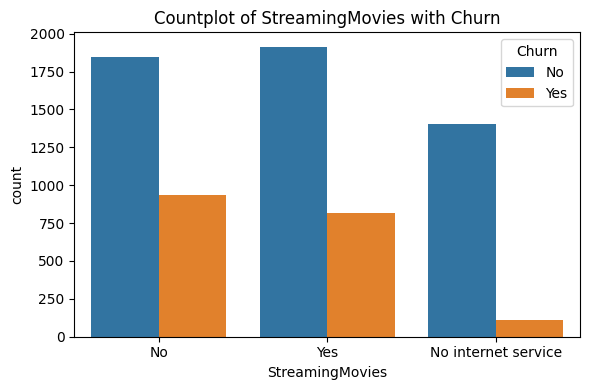

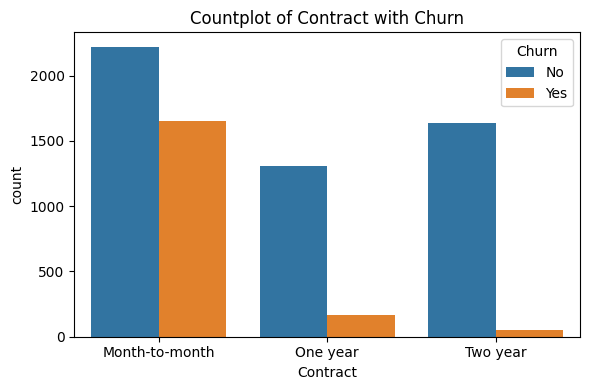

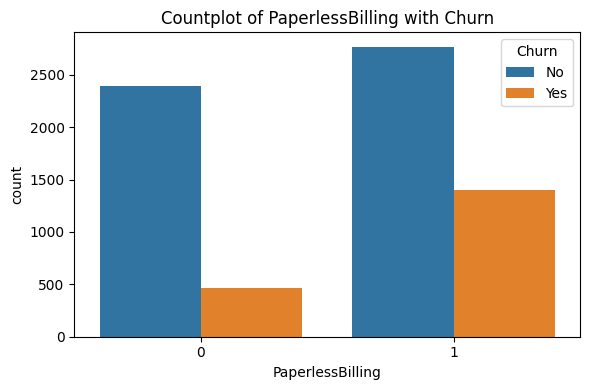

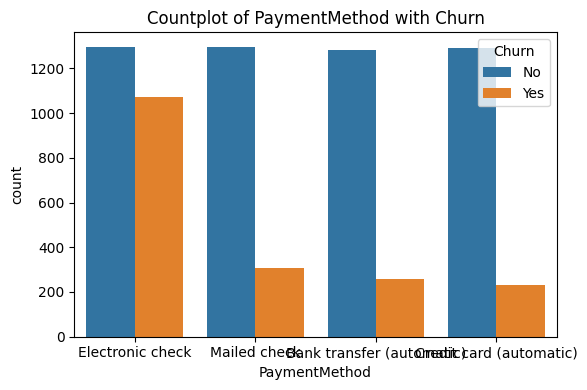

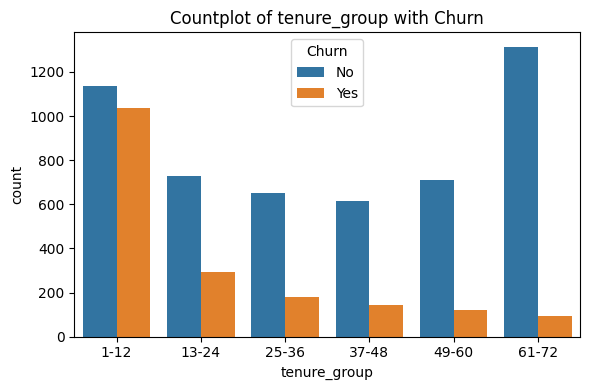

In [137]:
# Select important columns excluding 'Churn', 'TotalCharges', and 'MonthlyCharges'
important_columns = df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns

# Loop through columns and plot countplots
for column in important_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=column, hue='Churn')
    plt.title(f'Countplot of {column} with Churn')
    plt.tight_layout()
    plt.show()


Observations:
* **Gender** the ratio is almost the same, so gender is not an important trait independently, but when combined, it will have significance.
* **SeniorCitizen** Older customers are more likely to leave, and may need special attention or personalized offers to reduce their churn rate.
* **Partner** Customers with partners they are more likely to churn
* **Dependents** Customers with dependents they are less likely to churn
* **PhoneService** Customers with Phone Service are are more likely to churn
* **MultipleLines** Not much of an effect
* **InternetService** Customers with Fiber optic as their service are more likely to churn probably due to high costs
* **OnlineSecurity** Customers with Online Security are very less likely to churn than ones who don't have Online Security
* **OnlineBackup** Customers with OnlineBackup are less likely to churn
* **DeviceProtection** Customers with DeviceProtection are less likely to churn
* **StreamingTV/StreamingMovies** Not much of a effect as company doesn't charge an additional fee for these
* **Contract** Customers with contract of one year or more are very less likely to churn
* **PaperlessBilling** Not much of an effect
* **PaymentMethod** Customers who have paid through electronic check are very likely to churn and ones who paid through credit card are very less likely to churn
* **tenure_group** Customers who have tenure less than a year are the ones who are most likely to churn whereas the clients who have been with the company the longest are very less likely to churn

Now lets convert the target variable Churn into a binary numeric value i.e Yes=1, No=0

In [138]:
df['Churn'].replace(["Yes","No"], [1,0],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_7520\2363769137.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(["Yes","No"], [1,0],inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7520\2363769137.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'].replace(["Yes","

Let's also convert all the categorical variables into dummy variables

In [139]:
#One Hot Encoding
df_dummies = pd.get_dummies(df)
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,True,False,True,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,True,False,False,False
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,True,True,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,False,False,True,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,True,False,True,False,False,False,False,False


In [140]:
number_of_seniors = df[df['SeniorCitizen']==1].shape[0]
no_of_columns = df.shape[0]

# total not SeniorCitizen
(number_of_seniors/no_of_columns)*100

16.24004550625711

There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

Now lets check out the pairplot

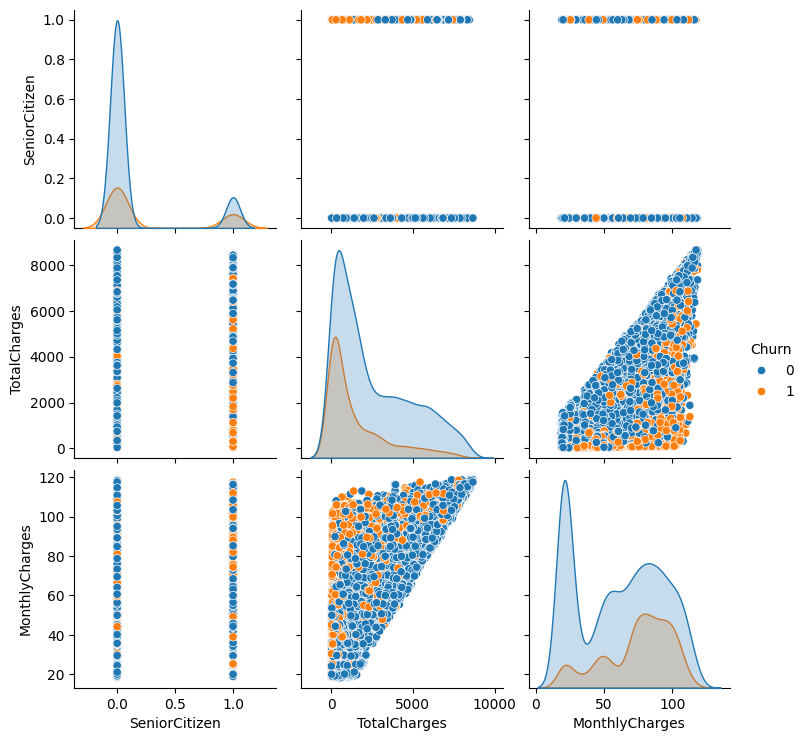

In [141]:
# Subset the DataFrame to include only the relevant columns
subset = df[['SeniorCitizen', 'TotalCharges', 'MonthlyCharges', 'Churn']]

# Plot the pairplot with the subset
sns.pairplot(subset, hue='Churn')


We can see that there is a relationship between MonthlyCharges and TotalCharges. 

TotalCharges Increases as Monthly Charges increases as expected. 

Conclusion from EDA

1- Short term contracts have higher churn rates.

2- Month to month contract is more likely opted by customers but has the greatest impact on the Churn rate (increases likelihood to churn by 6.31x).

3- Customers with a two yearly contract have a very low churn rate.

4- People with higher tenure are very less likely to churn as compared to shorter tenure (1 year).

5- The customers who pay through electronic checks have higher churn rate whereas the ones who pay through credit card have lower churn rate.

6- Customers without an internet service have a very low churn rate.

7- Customers who have Internet service as Fiber Optics as a service are more likely to Churn.

8- Senior Citizens are more likely to churn.

9- Additional features like Security, Backup, Device Protection and Tech Support make the customer less likely to churn.

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

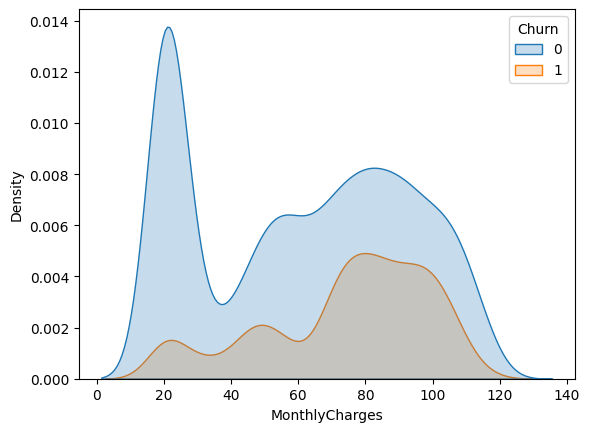

In [142]:
sns.kdeplot(data=df_dummies,x='MonthlyCharges',hue='Churn',fill=True)

<Axes: xlabel='TotalCharges', ylabel='Density'>

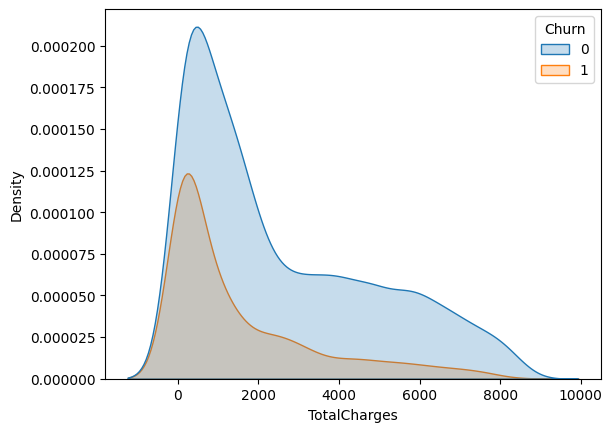

In [143]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='Churn',fill=True)

We find that the Customers are more likely to churn for lower monthly and total charges...Why is that?

<Axes: xlabel='TotalCharges', ylabel='Density'>

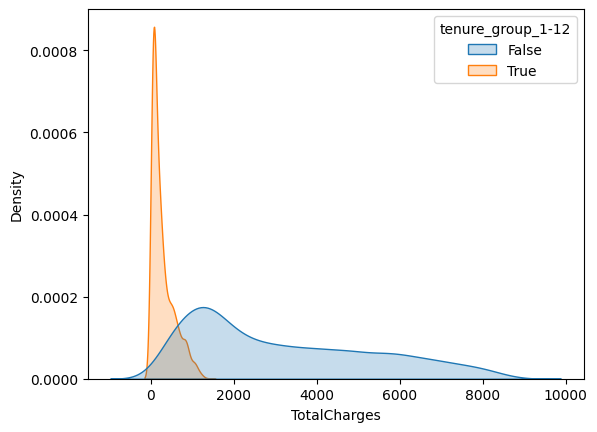

In [144]:
sns.kdeplot(data=df_dummies,x='TotalCharges',hue='tenure_group_1-12',fill=True)

We can see that people having a shorter tenure are the ones who are likely to churn and their Total charges will always be less due to their short tenures. 

Similarly, Low Monthly Charges users tend to churn because maybe they trying the service and will churn if they find some other service

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Lets check the additional services offered by the company

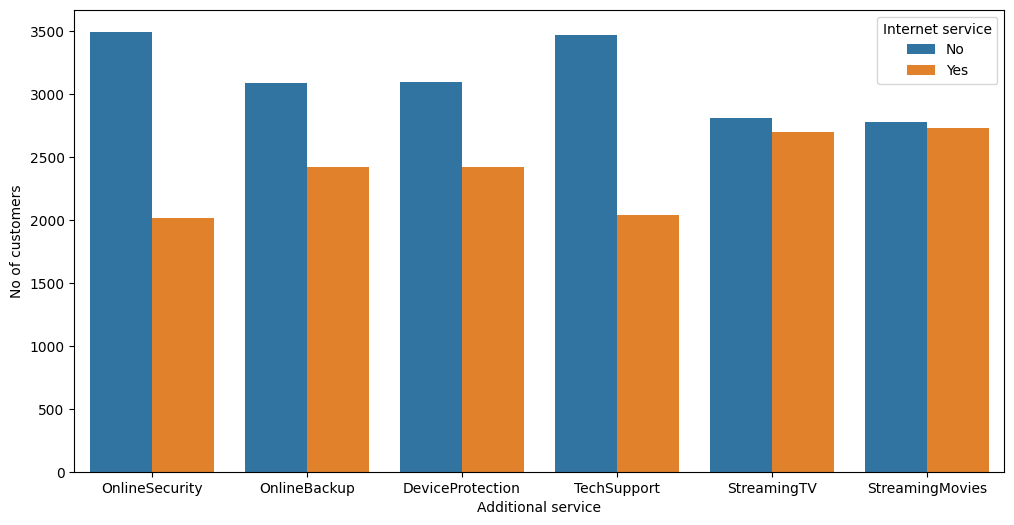

In [145]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df_service = pd.melt(df[df["InternetService"] != "No"][cols]).rename({'value': 'Internet service'}, axis=1)
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_service, x='variable', hue='Internet service')
ax.set(xlabel='Additional service', ylabel='No of customers')
plt.show()

check the correlations of Churn with other features

Text(0.5, 1.0, 'Positive Correlation')

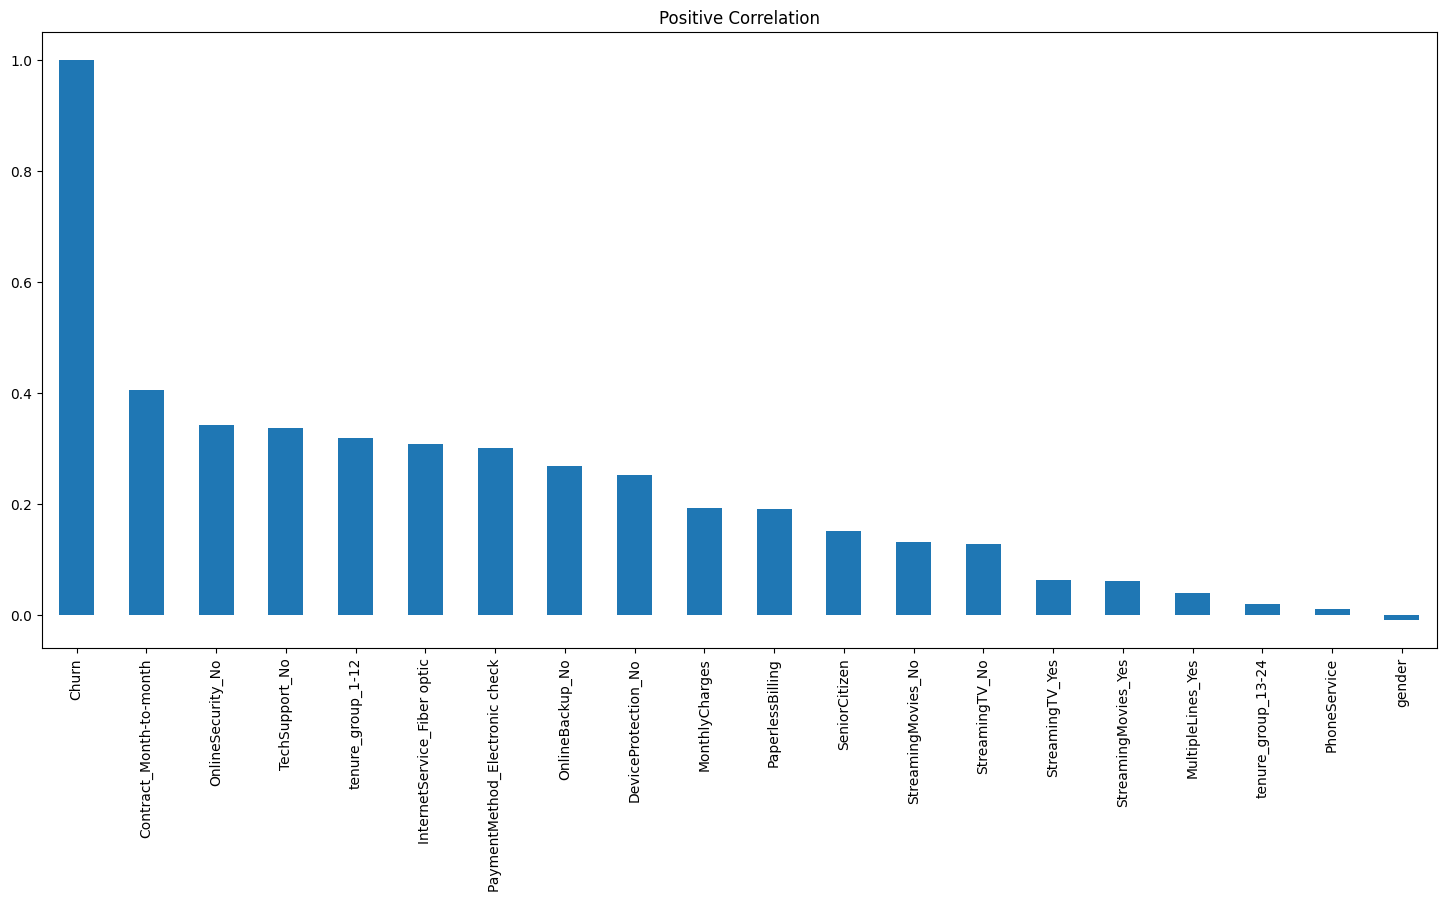

In [146]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[:20].plot(kind='bar')
plt.title('Positive Correlation')

Text(0.5, 1.0, 'Negative Correlation')

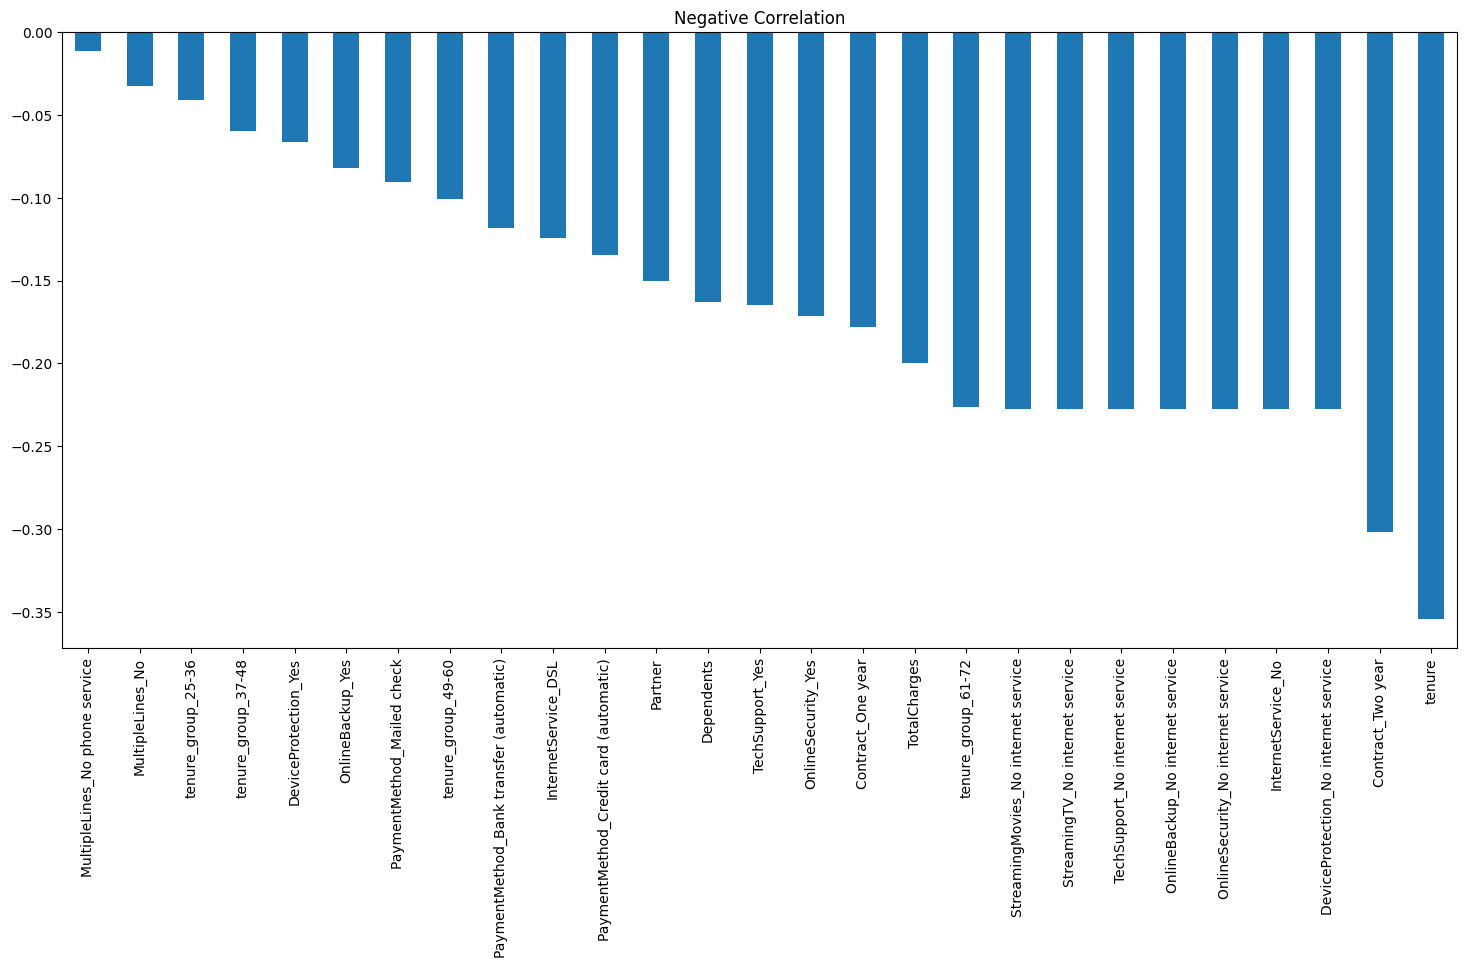

In [147]:
plt.figure(figsize=(18,8))
df_dummies.corr()['Churn'].sort_values(ascending = False)[20:].plot(kind='bar')
plt.title('Negative Correlation')

<Axes: >

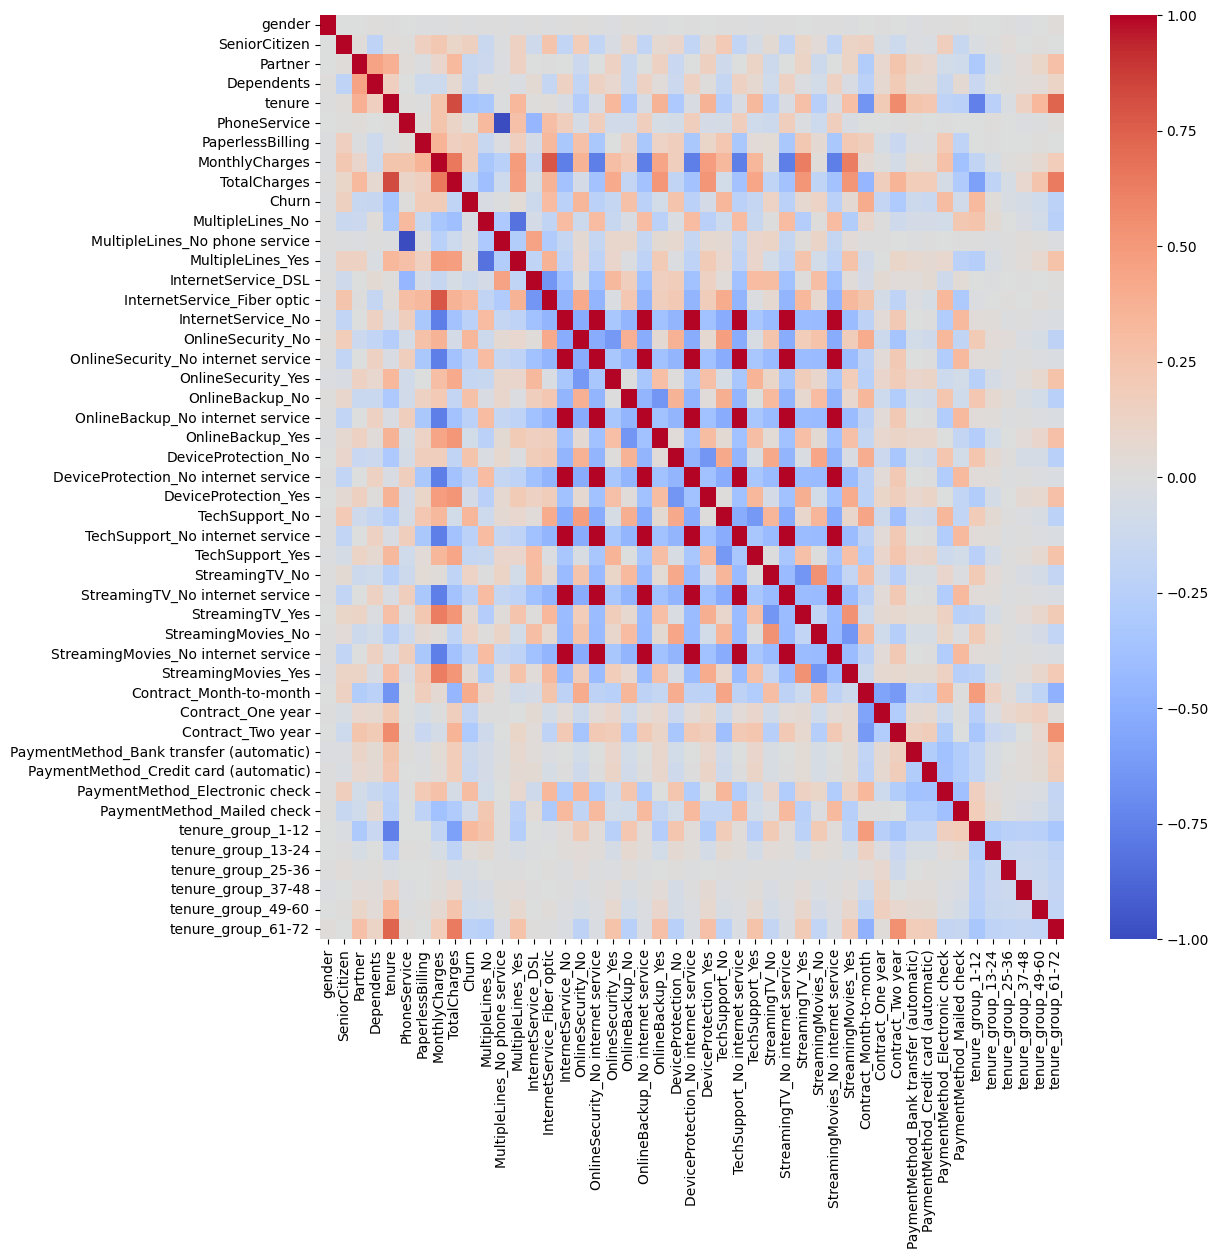

In [148]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(),cmap='coolwarm')

Insights:

From these correlation diagrams we can observe the following things:

  1- High Churn: Seen in cases of Month-to-Month Contacts, No Online Security, No Tech Support, First Year of Subscription and Fibre Optics Internet service

  2- Low Churn: Seen in cases of Long term Contacts, Subscriptions without Internet Service, and tenure of 5+ years

  3- Little to no Impact : Some cases like Mutiple Lines, Availability of Phone service and Gender have little to no impact on Churn on their own

Conclusion from EDA
1. Short term contracts have higher churn rates.
2. Month to month contract is more likely opted by customers but has the greatest impact on the Churn rate (increases likelihood to churn by 6.31x).
3. Customers with a two yearly contract have a very low churn rate.
4. People with higher tenure are very less likely to churn as compared to shorter tenure (1 year).
5. The customers who pay through electronic checks have higher churn rate whereas the ones who pay through credit card have lower churn rate.
6. Customers without an internet service have a very low churn rate.
7. Customers who have Internet service as Fiber Optics as a service are more likely to Churn.
8. Senior Citizens are more likely to churn.
9. Additional features like Security, Backup, Device Protection and Tech Support make the customer less likely to churn

# 3- Modeling (SVM)

## 3.1 Make new df

In [149]:
new_df = df.copy()

## 3.2 Encode categorical variables



In [150]:
new_df = pd.get_dummies(new_df)

## 3.3 Scale numerical features


In [151]:
charges_df = new_df[['TotalCharges','MonthlyCharges']] 

scaler = StandardScaler()
numerical_cols = ['MonthlyCharges', 'TotalCharges']
new_df[numerical_cols] = scaler.fit_transform(new_df[numerical_cols])

## 3.4 Split data into features (X) and target (y)

In [152]:
X = new_df.drop(columns=['Churn'])
y = new_df['Churn']

## 3.5 Train-test split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3.6 Train SVM model

In [154]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

## 3.7 Predict on test data

In [155]:
y_pred = svm.predict(X_test)

## 3.8 Evaluate model

In [156]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7825159914712153
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1033
           1       0.64      0.42      0.51       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407

Confusion Matrix:
[[944  89]
 [217 157]]


## 3.9 Create trained dataset
### for GUI

In [157]:
# Predict classes
y_pred = svm.predict(new_df.drop(columns=['Churn']))

# Get probabilities for both classes
probabilities = svm.predict_proba(new_df.drop(columns=['Churn']))

# Create a DataFrame for probabilities
prob_df = pd.DataFrame(probabilities[:, 1], columns=['Probability'])
prob_df['Probability (%)'] = prob_df['Probability'] * 100

# Define the risk assignment function
def assign_risk(prob):
    if prob >= 75:
        return "High Risky"
    elif prob >= 50:
        return "Risky"
    elif prob >= 25:
        return "Low Risky"
    else:
        return "Not Risky"

# Add the risk category to prob_df
prob_df['Risk'] = prob_df['Probability (%)'].apply(assign_risk)

# Add predictions (Yes/No based on predicted class)
prob_df['Prediction'] = ['Yes' if pred == 1 else 'No' for pred in y_pred]

# Add MonthlyCharges and TotalCharges to prob_df
prob_df['MonthlyCharges'] = charges_df['MonthlyCharges']
prob_df['TotalCharges'] = charges_df['TotalCharges']


# Display the updated DataFrame with probabilities, risk, predictions, and charges
prob_df.head()
# prob_df.to_csv("trained.csv", index=False)

,Probability,Probability (%),Risk,Prediction,MonthlyCharges,TotalCharges
0,0.651222,65.122208,Risky,Yes,29.85,29.85
1,0.080366,8.036635,Not Risky,No,56.95,1889.50
2,0.457029,45.702872,Low Risky,No,53.85,108.15
3,0.116137,11.613713,Not Risky,No,42.30,1840.75
4,0.807554,80.755409,High Risky,Yes,70.70,151.65


# 4- Decision Tree

## 4.1 Load and Preprocess the Data

In [158]:
df_tree = df_base.copy()

df_tree = df_tree.drop('customerID', axis=1)

df_tree['TotalCharges'] = pd.to_numeric(df_tree['TotalCharges'], errors='coerce')
df_tree['TotalCharges'].fillna(df_tree['TotalCharges'].median(), inplace=True)

categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df_tree[col] = LabelEncoder().fit_transform(df_tree[col])
    
print("Data preprocessing completed.")

Data preprocessing completed.


C:\Users\PC\AppData\Local\Temp\ipykernel_7520\3302388019.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tree['TotalCharges'].fillna(df_tree['TotalCharges'].median(), inplace=True)


## 4.2 Feature Selection

In [159]:
X = df_tree.drop('Churn', axis=1)
y = df_tree['Churn']

# Train a temporary Decision Tree to evaluate feature importance
temp_tree = DecisionTreeClassifier(random_state=42)
temp_tree.fit(X, y)

# Extract feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': temp_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the top features
print("Feature Importances:\n", feature_importances.head(10))

Feature Importances:
              Feature  Importance
18      TotalCharges    0.222415
17    MonthlyCharges    0.193029
14          Contract    0.169744
4             tenure    0.111793
8     OnlineSecurity    0.045325
16     PaymentMethod    0.039890
7    InternetService    0.028945
0             gender    0.026090
3         Dependents    0.020707
10  DeviceProtection    0.020194


## 4.3 Train-Test Split

In [160]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training and testing data split completed.")

Training and testing data split completed.


## 4.4 Train the Decision Tree

In [ ]:
# Train a Decision Tree on the selected features
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

print("Decision Tree model training completed.")

Decision Tree model training completed.


## 4.5 Evaluate the Model

In [162]:
# Make predictions on the test set¶
y_pred = dt_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred) 
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy) 
print("\nClassification Report:\n", report)

Accuracy: 0.7856128726928537

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1539
           1       0.66      0.44      0.52       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.69      2113
weighted avg       0.77      0.79      0.77      2113



## 4.4 Visualize the Decision Tree

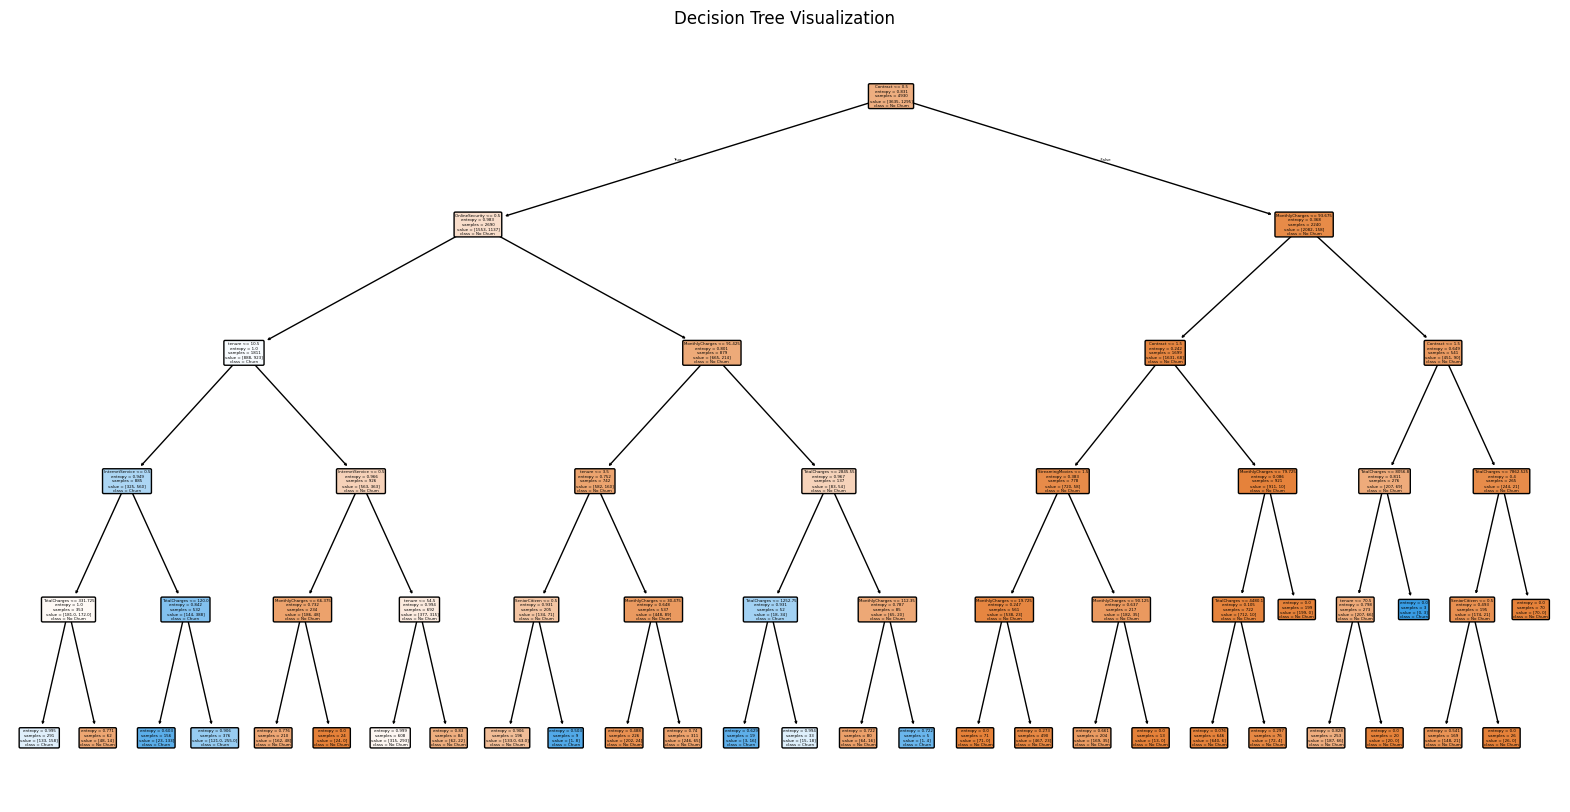

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Churn', 'Churn'], 
          filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# 5- Nive Bias Algorithm
## 5.1 Encode categorical variables

In [164]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group', 'Churn']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

## 5.2 Scale numerical features

In [165]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## 5.3 Data Spliting

In [166]:
# Separate features and target variable
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.4 Train the nive bias algorithm

In [167]:
# Initialize the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)


GaussianNB()

# 5.5 Evaluate the model

In [168]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.7412935323383084
Precision: 0.5093632958801498
Recall: 0.7272727272727273


# 5.6 Interprate the results

**`Accuracy`**: 0.741
Meaning: Approximately 74.1% of the predictions made by the model are correct.

**`Interpretation`**: This is a fairly good accuracy, indicating that the model is correctly predicting about three-quarters of the cases. However, accuracy alone doesn't tell the whole story, especially in the context of imbalanced classes.

**`Precision`**: 0.509
Meaning: Out of all the positive predictions made by the model (i.e., predicted churn), only about 50.9% are actual churn cases.

**`Interpretation`**: This relatively low precision suggests that the model has a high false positive rate, meaning it predicts churn for customers who actually don't churn. This could be problematic if the cost of false positives is high in your application.

**`Recall`**: 0.727
Meaning: Out of all the actual churn cases, the model correctly identifies approximately 72.7% of them.

**`Interpretation`**: This is a good recall, indicating that the model is capturing a significant portion of actual churn cases. Recall is important in churn prediction as it ensures that most of the customers who are at risk of churning are identified.

## **`Summary`**
Strengths: The model has a good recall, which means it is effective at identifying customers who are likely to churn. This is crucial for taking proactive measures to retain customers.

Weaknesses: The lower precision indicates a higher false positive rate, which could lead to unnecessary interventions for customers who are not actually at risk of churning.